# Sales Analysis Report

In [47]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Wrangling
## 1.1 Loading the Data
We loaded the dataset containing sales data for AAL clothing business in Australia into a DataFrame and conducted exploratory data analysis to gain insights into the structure and content of the dataset.

In [48]:
# Load the dataset
df = pd.read_excel('/Users/Ash/Desktop/dataAnalisisProject/SalesAnalysis/1688639662_ausapparalsales4thqrt2020.xlsx')

In [49]:
# Display the first 5 rows of the dataframe
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [50]:
# Display the shape of the dataframe
df.shape

(7560, 6)

In [51]:
# Display the number of rows and columns
print(f"Number of Rows: {len(df)}\nNumber of Columns: {len(df.columns)}")

Number of Rows: 7560
Number of Columns: 6


In [52]:
# Display information about columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


## 1.2 Cleaning the Data
In our analysis, we didn't encounter any missing data. However,we did encounter leading spaces in our columns so we took care of it by removing them.

In [53]:
# Check for missing values
df.isna().sum()
# No missing values found, so there is no need to perform further actions for handling missing data

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [54]:
# Remove leading and trailing spaces from string columns
df['Time'] = df['Time'].str.strip()
df['State'] = df['State'].str.strip()
df['Group'] = df['Group'].str.strip()

## 1.3 Normalizing Data
We've chosen to normalize the 'Unit' and 'Sales' columns to scale them to a standard range between 0 and 1. This will ensure that all features contribute equally to the analysis and prevent features with larger scales from dominating the analysis.

In [55]:
# Normalize the 'Unit' and 'Sales' columns
df['Unit_Normalized'] = (df['Unit'] - df['Unit'].min()) / (df['Unit'].max() - df['Unit'].min())
df['Sales_Normalized'] = (df['Sales'] - df['Sales'].min()) / (df['Sales'].max() - df['Sales'].min())
df.head()

,Date,Time,State,Group,Unit,Sales,Unit_Normalized,Sales_Normalized
0,2020-10-01,Morning,WA,Kids,8,20000,0.095238,0.095238
1,2020-10-01,Morning,WA,Men,8,20000,0.095238,0.095238
2,2020-10-01,Morning,WA,Women,4,10000,0.031746,0.031746
3,2020-10-01,Morning,WA,Seniors,15,37500,0.206349,0.206349
4,2020-10-01,Afternoon,WA,Kids,3,7500,0.015873,0.015873


## 1.4 usage of the groupby() function for data chunking or merging.

Handle missing values, verify output alignment, and document your code for clarity and maintainability, ensuring efficient utilization of the groupby() function for seamless data chunking and merging in your analysis workflows.

# 2. Data Analysis
## 2.1 Descriptive Statistical Analysis
We performed descriptive statistical analysis on the 'Unit' and 'Sales' columns using techniques such as mean, median, mode, and standard deviation.

In [56]:
# Descriptive statistical analysis
df['Unit'].describe()

count    7560.000000
mean       18.005423
std        12.901403
min         2.000000
25%         8.000000
50%        14.000000
75%        26.000000
max        65.000000
Name: Unit, dtype: float64

In [57]:
print(f"median      {df['Unit'].median()}")
print(f"mode        {df['Unit'].mode()}")

median      14.0
mode        0    9
Name: Unit, dtype: int64


In [58]:
df['Sales'].describe()

count      7560.000000
mean      45013.558201
std       32253.506944
min        5000.000000
25%       20000.000000
50%       35000.000000
75%       65000.000000
max      162500.000000
Name: Sales, dtype: float64

In [59]:
print(f"median      {df['Sales'].median()}")
print(f"mode        {df['Sales'].mode()}")

median      35000.0
mode        0    22500
Name: Sales, dtype: int64


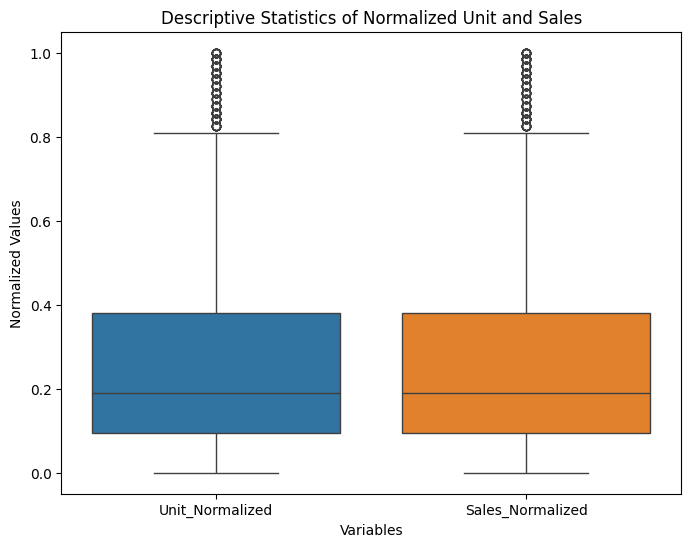

In [60]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Unit_Normalized', 'Sales_Normalized']])
plt.title('Descriptive Statistics of Normalized Unit and Sales')
plt.ylabel('Normalized Values')
plt.xlabel('Variables')
plt.show()

## 2.2 Group/State-wise Analysis
We'll determine which group is generating the highest and lowest sales and which state is generating the highest and lowest sales.

In [61]:
# Group-wise analysis
group_sales = df.groupby('Group')['Sales'].sum()
print(f"Group-wise Sales Analysis:\n{'-' * 27}")
print(group_sales)

Group-wise Sales Analysis:
---------------------------
Group
Kids       85072500
Men        85750000
Seniors    84037500
Women      85442500
Name: Sales, dtype: int64


In [62]:
# State-wise analysis
state_sales = df.groupby('State')['Sales'].sum()
print(f"State-wise Sales Analysis:\n{'-' * 27}")
print(state_sales)

State-wise Sales Analysis:
---------------------------
State
NSW     74970000
NT      22580000
QLD     33417500
SA      58857500
TAS     22760000
VIC    105565000
WA      22152500
Name: Sales, dtype: int64


In [63]:
# Determine highest and lowest Sales Group and Sales State
highest_sales_group = group_sales.idxmax()
lowest_sales_group = group_sales.idxmin()

highest_sales_state = state_sales.idxmax()
lowest_sales_state = state_sales.idxmin()

print(f"Highest Sales Group: {highest_sales_group}")
print(f"Lowest Sales Group: {lowest_sales_group}")
print(f"Highest Sales State: {highest_sales_state}")
print(f"Lowest Sales State: {lowest_sales_state}")

Highest Sales Group: Men
Lowest Sales Group: Seniors
Highest Sales State: VIC
Lowest Sales State: WA


## 2.3 Generating Reports
To provide insights for strategic decision-making, we generated weekly, monthly, and quarterly reports summarizing the sales performance over time.

In [64]:
# Converting the Date Column to Datetime
df['Date'] = pd.to_datetime(df['Date'])

# Weekly report
weekly_report = df.groupby(df['Date'].dt.isocalendar().week)['Sales'].sum()

# Monthly report
monthly_report = df.groupby(df['Date'].dt.to_period('M'))['Sales'].sum()

# Quarterly report
quarterly_report = df.groupby(df['Date'].dt.to_period('Q'))['Sales'].sum()

print(f"{'-' * 50}\nWeekly report")
print(f"{weekly_report}\n{'-' * 50}")

print(f"Monthly report:")
print(f"{monthly_report}\n{'-' * 50}")

print(f"Quarterly report:")
print(f"{quarterly_report}\n{'-' * 50}")

--------------------------------------------------
Weekly report
week
40    15045000
41    27002500
42    26640000
43    26815000
44    21807500
45    20865000
46    21172500
47    21112500
48    21477500
49    29622500
50    31525000
51    31655000
52    31770000
53    13792500
Name: Sales, dtype: int64
--------------------------------------------------
Monthly report:
Date
2020-10    114290000
2020-11     90682500
2020-12    135330000
Freq: M, Name: Sales, dtype: int64
--------------------------------------------------
Quarterly report:
Date
2020Q4    340302500
Freq: Q-DEC, Name: Sales, dtype: int64
--------------------------------------------------


# 3. Data Visualization
## 3.1 State-wise Sales Analysis
We visualized state-wise sales analysis for different groups (kids, women, men, and seniors).
We chose to use seaborn for visualizing the state-wise sales analysis for different groups. Seaborn provides a high-level interface for drawing attractive and informative statistical graphics. Its simplicity and ability to create complex visualizations with concise code make it suitable for our analysis. Additionally, seaborn offers various built-in themes and color palettes that enhance the aesthetics of the plots, ensuring better readability and interpretability of the data.

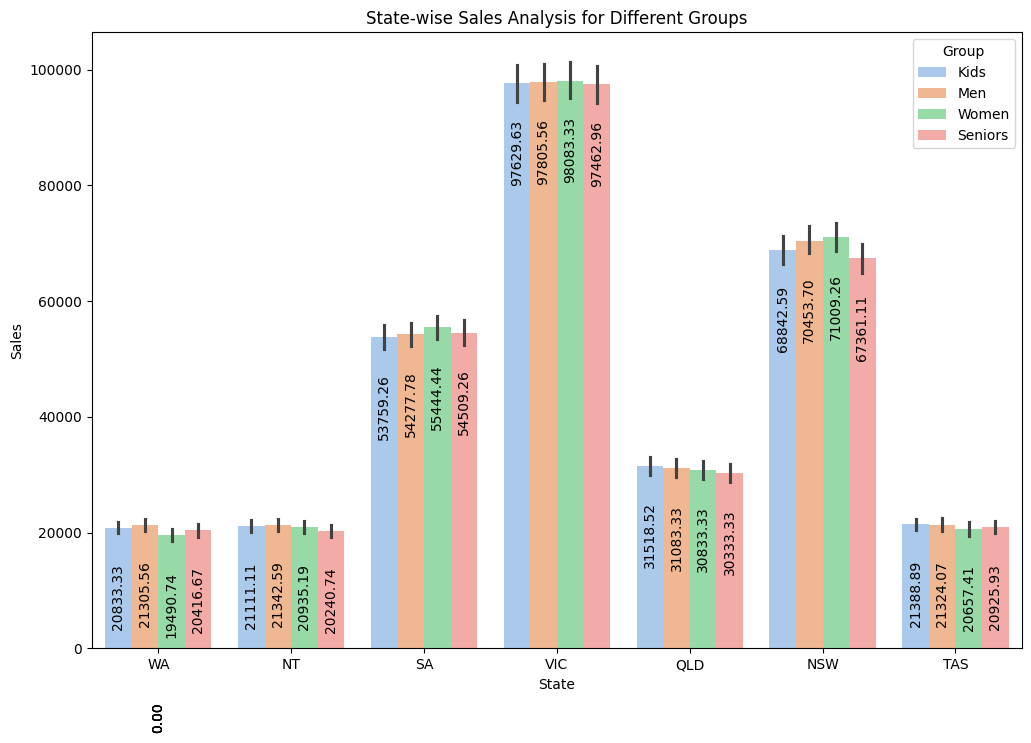

In [65]:
# State-wise sales analysis for different groups
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df, x='State', y='Sales', hue='Group', palette='pastel')

# Add exact values inside each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', rotation=90,
                xytext=(0, -50), textcoords='offset points')

plt.title('State-wise Sales Analysis for Different Groups')
plt.xlabel('State')
plt.ylabel('Sales')
plt.legend(title='Group')
plt.show()


## 3.2 Group-wise Sales Analysis
Next, we visualized group-wise sales analysis across different states.

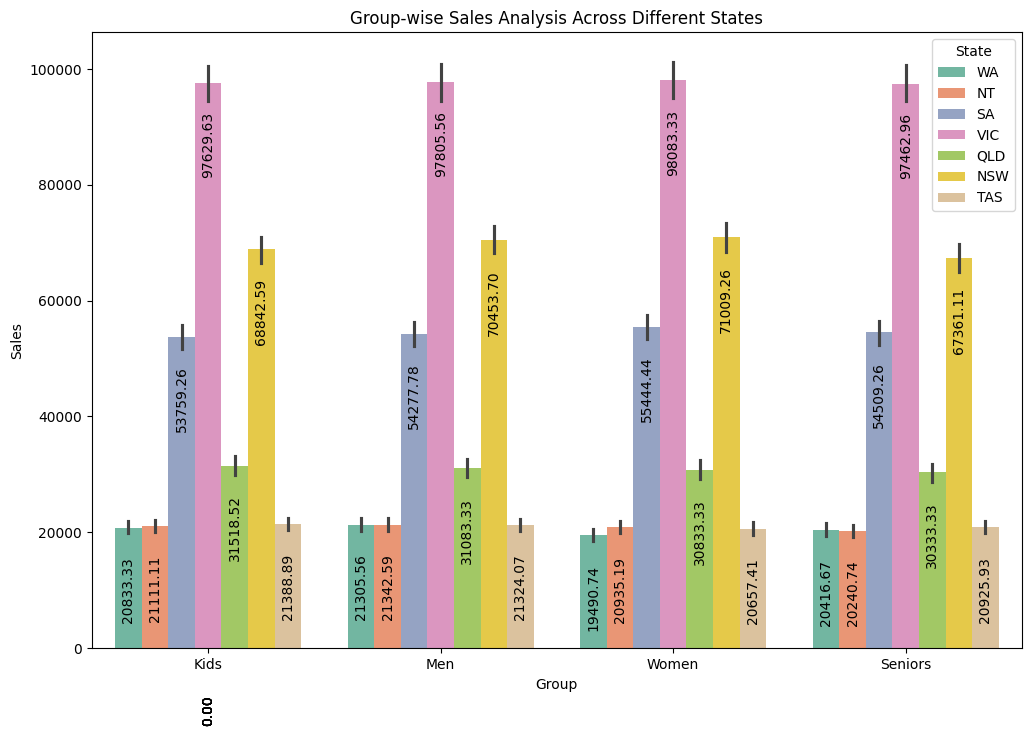

In [66]:
# Group-wise sales analysis across different states
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df, x='Group', y='Sales', hue='State', palette='Set2')

# Add exact values inside each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', rotation=90,
                xytext=(0, -45), textcoords='offset points')

plt.title('Group-wise Sales Analysis Across Different States')
plt.xlabel('Group')
plt.ylabel('Sales')
plt.legend(title='State')
plt.show()


## 3.3 Time-of-the-day Analysis
Lastly, we analyzed the time-of-the-day when sales are highest and lowest.

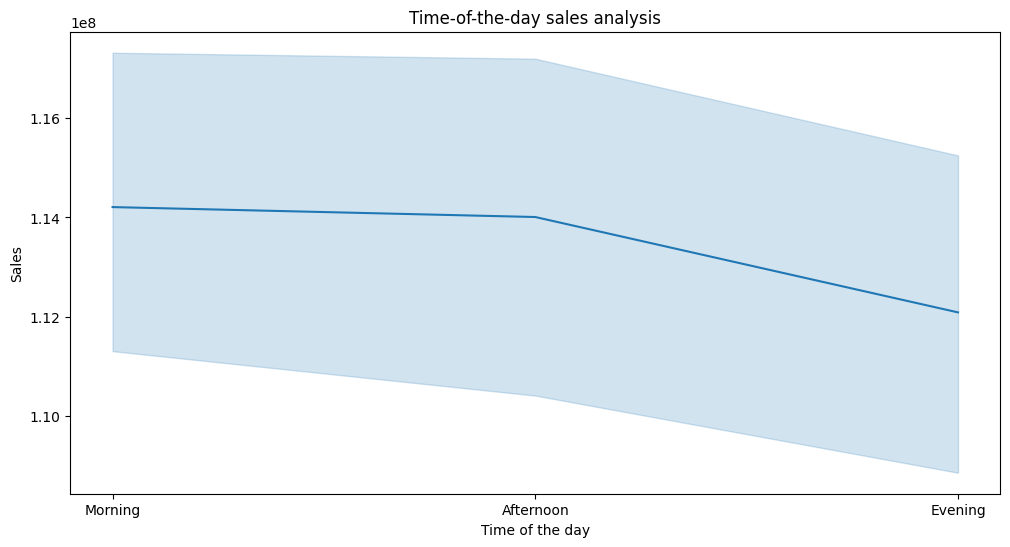

Highest Sales Time: Morning
Lowest Sales Time: Evening


In [67]:
# Time-of-the-day analysis
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Time', y='Sales', estimator=sum)
plt.title('Time-of-the-day sales analysis')
plt.xlabel('Time of the day')
plt.ylabel('Sales')
plt.show()

# Determine highest and lowest sales times
highest_sales_time = df.groupby('Time')['Sales'].sum().idxmax()
lowest_sales_time = df.groupby('Time')['Sales'].sum().idxmin()

print("Highest Sales Time:", highest_sales_time)
print("Lowest Sales Time:", lowest_sales_time)

## 3.4 Creating Dashboard with Daily, Weekly, Monthly, Quarterly Reports Charts

We aggregated the sales data to analyze trends on daily, weekly, monthly, and quarterly basis.


/var/folders/y8/sxqdbfbx5hn4324ynvcvg8wr0000gp/T/ipykernel_23399/1688502536.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = daily_sales.resample('M').sum()
/var/folders/y8/sxqdbfbx5hn4324ynvcvg8wr0000gp/T/ipykernel_23399/1688502536.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = daily_sales.resample('Q').sum()
/opt/anaconda3/envs/ash/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


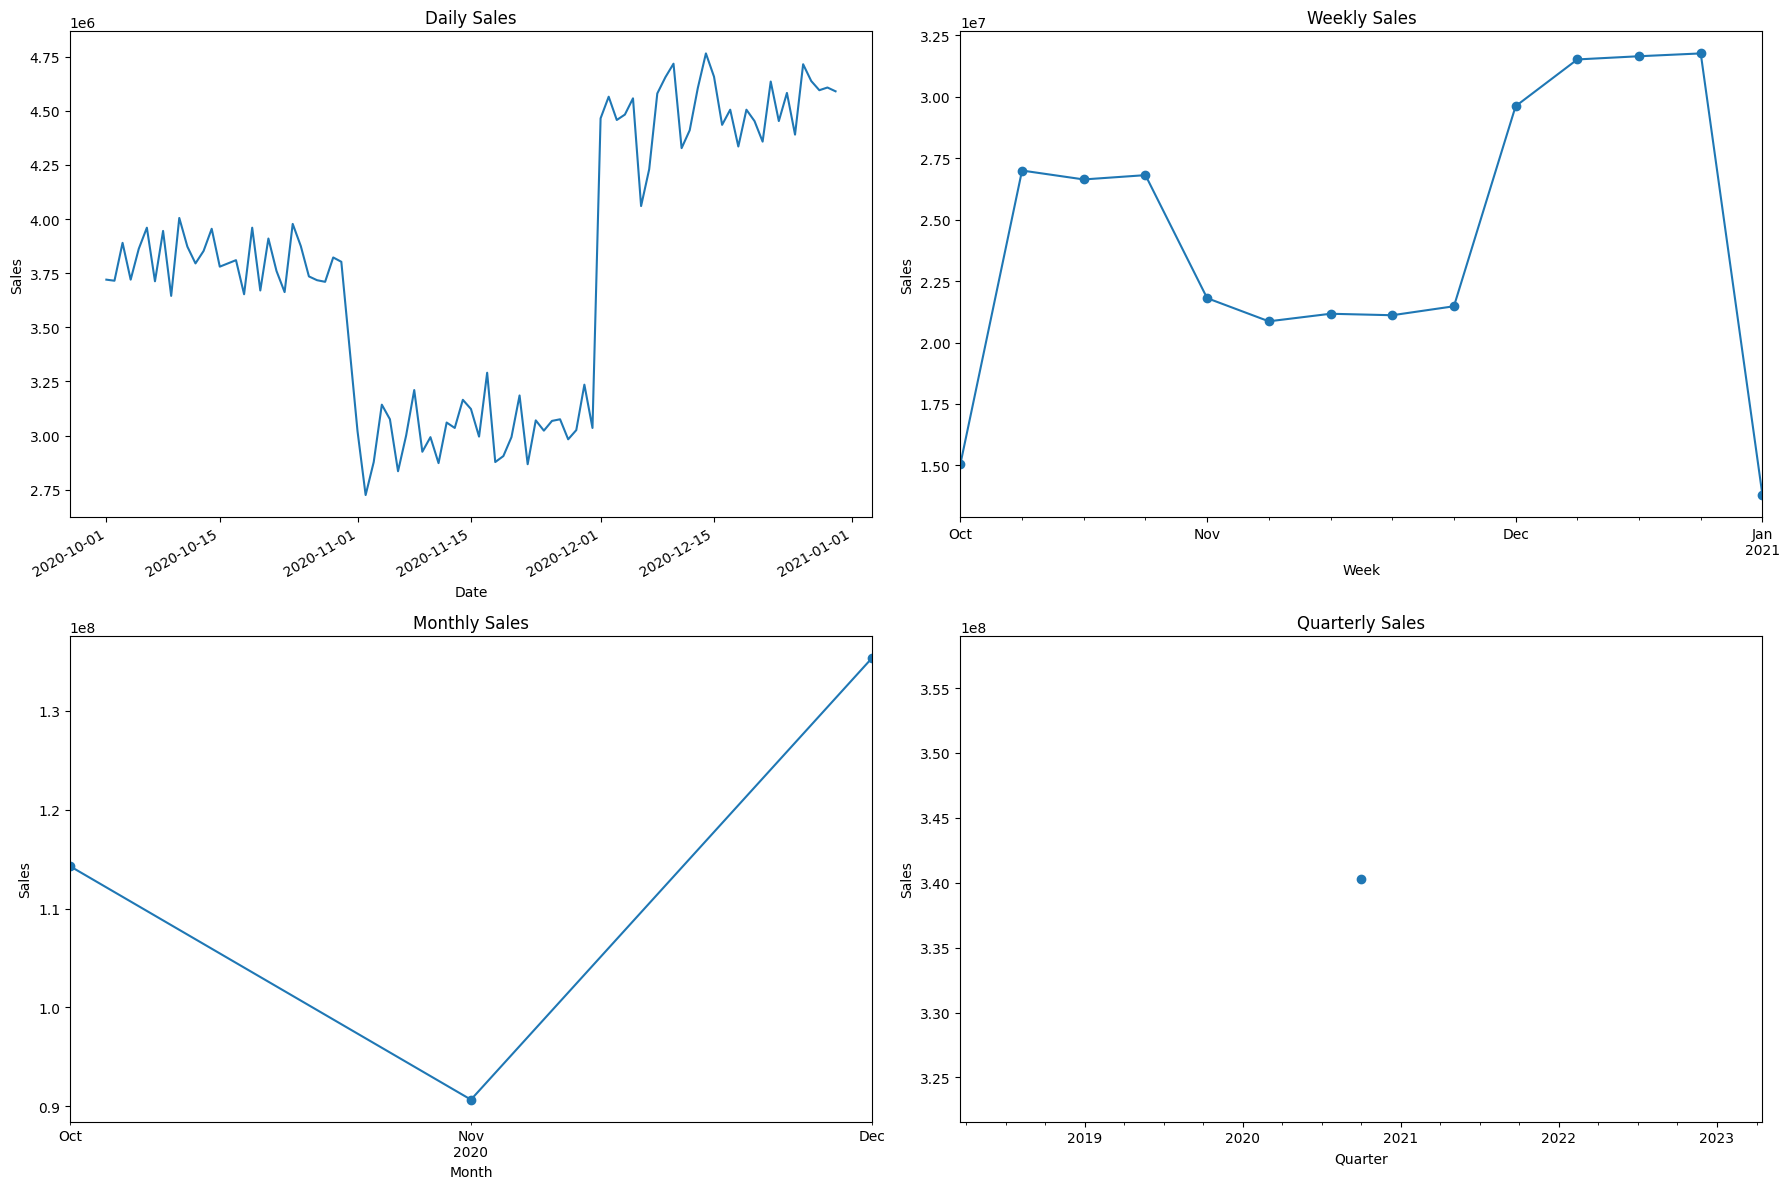

In [69]:
# Aggregate data for daily, weekly, monthly, and quarterly analysis
daily_sales = df.groupby('Date')['Sales'].sum()
weekly_sales = daily_sales.resample('W').sum()
monthly_sales = daily_sales.resample('M').sum()
quarterly_sales = daily_sales.resample('Q').sum()

# Plot daily, weekly, monthly, and quarterly sales
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
daily_sales.plot()
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.subplot(2, 2, 2)
weekly_sales.plot(marker='o')
plt.title('Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Sales')

plt.subplot(2, 2, 3)
monthly_sales.plot(marker='o')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.subplot(2, 2, 4)
quarterly_sales.plot(marker='o')
plt.title('Quarterly Sales')
plt.xlabel('Quarter')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

## 4. Conclusion

In this project, we conducted a comprehensive analysis of the sales data for AAL clothing business in Australia. Here's a summary of our key findings and insights:

1. **Data Wrangling**:
    - We loaded the dataset, checked for missing values (which were not found), and normalized the 'Unit' and 'Sales' columns for uniformity.
   
2. **Data Analysis**:
   - Descriptive statistical analysis provided insights into the typical sales patterns and variability in the data.
   - Group-wise analysis helped us understand which group and states were driving the highest and lowest sales.
   - We also generated weekly, monthly, and quarterly reports to track sales performance over time.

3. **Data Visualization**:
   - We utilized visualizations such as bar plots and line plots to illustrate state-wise and time-of-the-day sales analysis, offering actionable insights for the sales and marketing teams.

4. **Recommendations**:
   - Based on our analysis, we recommend focusing on the top-performing groups and states to maximize sales revenue.
   - Implementing targeted marketing strategies during peak sales hours can help capitalize on potential sales opportunities.

5. **Learning Outcomes**:
   - Through this project, we gained hands-on experience in data wrangling, exploratory data analysis, and data visualization techniques.
   - We also learned the importance of data-driven decision-making in optimizing business performance and enhancing strategic planning.

In conclusion, this analysis provides valuable insights that empower the sales and marketing teams to make informed decisions and foster business growth for AAL clothing business in Australia.

**Prepared by:**
- Raghad Alamoudi
- Ashjan Almutairi
- Laila Alshamlan
